In [535]:
import rdkit 
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [536]:
import sys
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from parametric_tsne.parametric_tSNE import Parametric_tSNE
from parametric_tsne.parametric_tSNE.utils import get_multiscale_perplexities

In [537]:
import glob
files=glob.glob("/home/cmu/Desktop/tutorial/pdbs/*.pdb")

In [538]:
mol_1 = []
for i in range(len(files)):
    m = Chem.MolFromPDBFile(files[i])
    mol_1.append(m)

In [404]:
def Mor_fps(mol_virus):
    fp_virus =  [];
    for fp in mol_virus:
        fp_virus.append(AllChem.GetMorganFingerprintAsBitVect(fp, 8,useFeatures=True,nBits = 256)); # morgan fingerprints - virus  
    return fp_virus

In [407]:
a = Mor_fps(mol_1)

In [409]:
def combination(fp_virus):
    Mor = np.zeros((len(fp_virus),256))
    virus_list = []
    for i in range(0,len(fp_virus)):
        arr2 = np.zeros((1,));
        DataStructs.ConvertToNumpyArray(fp_virus[i], arr2);
        a = arr2.tolist()
        virus_list.append(a)
    v_f = np.asarray(virus_list)
    for i in range (len(v_f)):
            Mor[i] =  v_f[i]  
    return Mor

In [410]:
mol_data = combination(a)

In [429]:
mol_data.shape

(32, 256)

In [476]:
noise = np.random.normal(0,1,size = (32,256))
info = np.add(mol_data, noise)

In [477]:
info.shape

(32, 256)

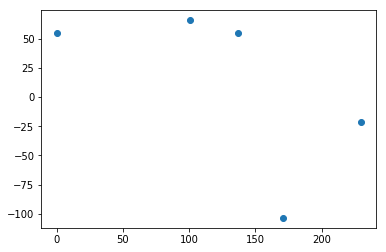

In [504]:
tsne = TSNE(n_components = 2,perplexity = 10)
new_mol = tsne.fit_transform(mol_data)
reduced = tsne.embedding_
# plt.scatter(reduced[:5,0],reduced[:5,1])
plt.scatter(new_mol[:5,0],new_mol[:5,1])

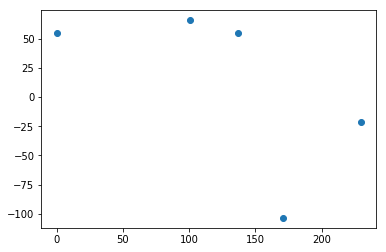

In [506]:
plt.scatter(reduced[:5,0],reduced[:5,1])

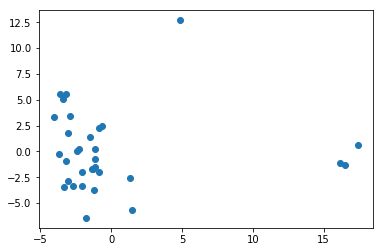

In [530]:
pca = PCA(n_components = 2, svd_solver = 'randomized')
pca_data = pca.fit_transform(info)
plt.scatter(pca_data[:,0], pca_data[:,1])
# pca_data

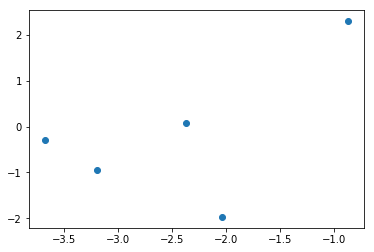

In [531]:
plt.scatter(pca_data[-5:,0], pca_data[-5:,1])

In [512]:
num_clusters = 3
override = True
num_samps = 32
do_pretrain = True
epochs = 20
perplexity = 10
batches_per_epoch = 16
batch_size = 1
num_outputs = 2

In [382]:
from tensorflow.contrib.keras import layers

In [458]:
all_layers = [
       layers.Dense(128, input_shape=(256,), activation='relu', kernel_initializer='glorot_uniform'),
       layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform'),
       layers.Dense(2, activation=None, kernel_initializer='glorot_uniform')
]


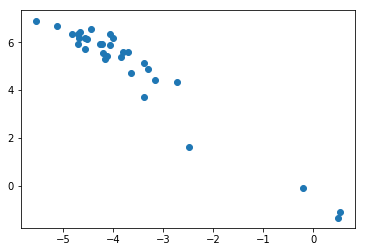

In [464]:
ptSNE = Parametric_tSNE(
       256, 2, 10, all_layers=all_layers,
       alpha=1.0, do_pretrain=True, batch_size=batch_size, seed=7777)
ptSNE.fit(mol_data)
output = ptSNE.transform(info)
plt.scatter(output[:,0],output[:,1])

In [401]:
# ptSNE = Parametric_tSNE(256, num_outputs,perplexity)

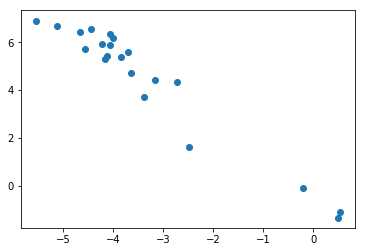

In [465]:
plt.scatter(output[:21,0],output[:21,1])